<a href="https://colab.research.google.com/github/mrrivaldo/Compare-Canny-Sobel-LogSobel/blob/main/Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
def canny_edge_detection(image, lower_threshold=100, upper_threshold=200):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, lower_threshold, upper_threshold)
    return edges

image_path = 'building.png'
image = cv2.imread(image_path)
canny_edges = canny_edge_detection(image, 100, 200)


In [3]:
#SOBEL EDGE
def sobel_edge_detection(image, ksize=3, scale=1, delta=0):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray_image, cv2.CV_16S, 1, 0, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    grad_y = cv2.Sobel(gray_image, cv2.CV_16S, 0, 1, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    edges = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    return edges
# Contoh penggunaan
sobel_edges = sobel_edge_detection(image)


In [4]:
#Log Sobel

def log_sobel_edge_detection(image, ksize=3, scale=1, delta=0):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (ksize, ksize), 0)

    # Apply Laplacian operator for edge detection
    edges = cv2.Laplacian(blurred_image, cv2.CV_16S, ksize=ksize, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
    edges = cv2.convertScaleAbs(edges)
    return edges

# Contoh penggunaan
log_sobel_edges = log_sobel_edge_detection(image)


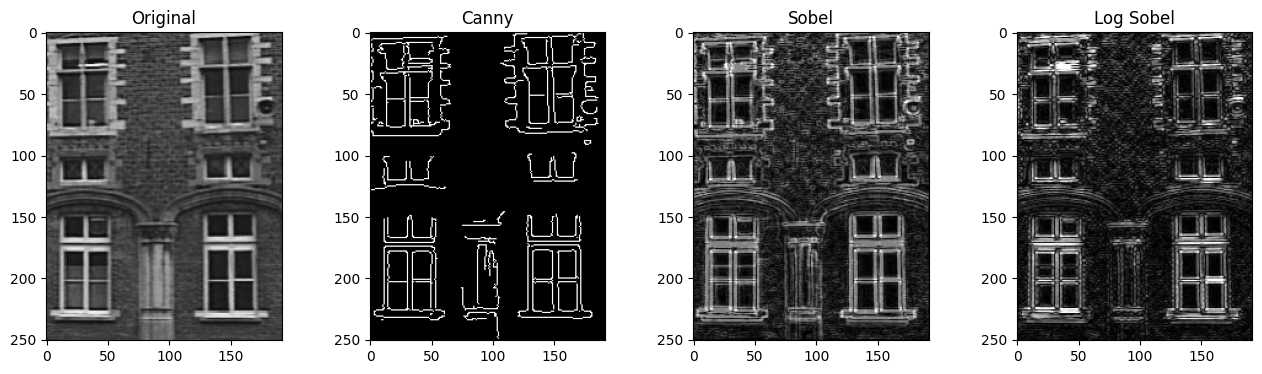

Number of edges detected by Canny: 4007
Number of edges detected by Sobel: 48016
Number of edges detected by LOG Sobel: 47048


In [5]:
# Display the images
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
ax1.set_title('Original')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax2.set_title('Canny')
ax2.imshow(canny_edges, cmap='gray')
ax3.set_title('Sobel')
ax3.imshow(sobel_edges, cmap='gray')
ax4.set_title('Log Sobel')
ax4.imshow(log_sobel_edges, cmap='gray')
plt.show()



# Count the number of edges
canny_edge_count = np.count_nonzero(canny_edges)
sobel_edge_count = np.count_nonzero(sobel_edges)
log_sobel_edge_count = np.count_nonzero(log_sobel_edges)

# Count the number of edges
print(f"Number of edges detected by Canny: {canny_edge_count}")
print(f"Number of edges detected by Sobel: {sobel_edge_count}")
print(f"Number of edges detected by LOG Sobel: {log_sobel_edge_count}")

In [17]:
def calculate_noise(image, edges):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    squared_diff = np.square(gray_image - edges)
    mse = np.mean(squared_diff)
    return mse


# Calculate noise for Canny edges
canny_noise = calculate_noise(image, canny_edges)

# Calculate noise for Sobel edges
sobel_noise = calculate_noise(image, sobel_edges)

# Calculate noise for Log Sobel edges
log_sobel_noise = calculate_noise(image, log_sobel_edges)

# Print the noise values
print(f"Noise for Canny edges: {canny_noise}")
print(f"Noise for Sobel edges: {sobel_noise}")
print(f"Noise for Log Sobel edges: {log_sobel_noise}")


Noise for Canny edges: 109.19671314741036
Noise for Sobel edges: 106.76556274900399
Noise for Log Sobel edges: 110.02954847277556


**Canny Edge Detection** </br>
Lebih jelas dan akurat dalam memberikan edge, karena menghilangkan noise terlebih dahulu dengan menggunakan gaussian blur </br>
**Sobel Edge Detection** </br>
Mampu mendeteksi edge lebih banyak dan lebih tebal tetapi masih memiliki noise. Sobel mampu mendeteksi edge horizontal dan vertikal dari bentuk gabungan</br>
**Log Sobel Edge Detection** </br>
Menghasilkan edge yang lebih tebal dan lebih kasar dari canny maupun sobel tetapi mampu menghasilkan edge seperti gambar aslinya. Log Sobel juga lebih mahal dalam komputasi karena menggunakan gaussian filter dan laplacian opreator

